## Import libraries

In [33]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data

In [34]:
tmdb_box = pd.read_csv('tmdb_box_merge_new.csv')

## Data Processing

In [35]:
tmdb_box.head(2)

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0


In [36]:
# drop 'Unnamed: 0' col
#tmdb_box.drop(columns=['Unnamed: 0'], inplace=True)

### Convert gross & budget value to Millions 

In [37]:
# gross, budge in Millions
for col in ('production_budget', 'domestic_gross_x','worldwide_gross'):
    tmdb_box[col] = tmdb_box[col]/1000000

## Add Profit Column
- profit = worldwide_gross - production_bugdet (didn't taken into account of other costs)

In [38]:
# check 
tmdb_box.shape

(26006, 13)

In [39]:
tmdb_box['genre_ids'].isnull().sum() # most movies has genre_ids (Q, []?)

1505

In [40]:
# check number of null values
tmdb_box['domestic_gross_x'].isnull().sum()

23839

In [41]:
# check number of null values
tmdb_box['worldwide_gross'].isnull().sum()

23839

In [42]:
# all non null rows of 'domestic_gross_x' & 'worldwide_gross' match
mask = (tmdb_box['domestic_gross_x'].isnull())&(~tmdb_box['worldwide_gross'].isnull())
tmdb_box.loc[mask]              

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month


In [43]:
# Add Profit column 
tmdb_box['profit'] = tmdb_box['worldwide_gross']-tmdb_box['production_budget']
tmdb_box.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month,profit
0,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0,635.063875
1,Dark Phoenix,350.0,42.762350,149.762350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0,-200.237650
2,Avengers: Age of Ultron,330.6,459.005868,1403.013963,BV,"[28, 12, 878]",en,44.383,7.3,13457.0,2015-05-01,2015.0,5.0,1072.413963
3,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,12.0,999.721747
4,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,12.0,1747.311220


### Parsing Genre

- parse genre_ids 

```
    orginal form:  
        movie 1, genre_ids '[12, 14, 10751]'
    target form: 
        movie 1, genre_id 12
        movie 1, genre_id 14
        movie 1, genre_id 10751
```  

In [44]:
import string
def parse_str(s):
    ''' convert s to a list of numbers
        example: 
        input: s = '[12, 14, 10751]'
        output: ['12', '14', '10751']   
    '''
    # strip all punctuation from a string 
    s = s.translate(str.maketrans('', '', string.punctuation))
    # string to list 
        # alternative: s_list = [int(n) for n in s.split()]
    return s.split()

In [45]:
# covert genre_ids '[12, 14, 10751]' to  list of int ['12', '14', '10751']
mask = ~tmdb_box['genre_ids'].isnull()
tmdb_box.loc[mask, 'genre_ids'] = tmdb_box.loc[mask,'genre_ids'].apply(parse_str)

In [46]:
# df_genre"  =  a copy of original df 
tmdb_box_genre = tmdb_box.copy() # a slice copy of tmdb_movies

In [47]:
tmdb_box_genre.columns

Index(['title', 'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'studio', 'genre_ids', 'original_language', 'popularity',
       'vote_average', 'vote_count', 'date', 'Year', 'Month', 'profit'],
      dtype='object')

In [48]:
# melt tmdb_movies_genre based on ['genre_ids']
id_vars = [col for col in tmdb_box_genre.columns if col !='genre_ids']
tmdb_box_genre = tmdb_box_genre['genre_ids'].apply(pd.Series)\
                    .merge(tmdb_box_genre, left_index = True, right_index = True)\
                    .drop(["genre_ids"], axis = 1)\
                    .melt(id_vars = id_vars, value_name = "genre")

In [49]:
# drop col 'variable'
tmdb_box_genre.drop(columns=['variable'], inplace = True)  
# drop rows with genre NaN 
tmdb_box_genre.dropna(subset = ['genre'], inplace = True)

In [50]:
# mapping genres_id to genre
tmdb_genres=[{'id': 28, 'name': 'Action'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 35, 'name': 'Comedy'},
            {'id': 80, 'name': 'Crime'},
            {'id': 99, 'name': 'Documentary'},
            {'id': 18, 'name': 'Drama'},
            {'id': 10751, 'name': 'Family'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 36, 'name': 'History'},
            {'id': 27, 'name': 'Horror'},
            {'id': 10402, 'name': 'Music'},
            {'id': 9648, 'name': 'Mystery'},
            {'id': 10749, 'name': 'Romance'},
            {'id': 878, 'name': 'Science Fiction'},
            {'id': 10770, 'name': 'TV Movie'},
            {'id': 53, 'name': 'Thriller'},
            {'id': 10752, 'name': 'War'},
            {'id': 37, 'name': 'Western'}]

In [51]:
# create a dict with {id_value1:genre1, id_value2:genre2} from tmdb_genres
genre_dict = {}
for pair in tmdb_genres:
    genre_dict[pair['id']] = pair['name']

# 'genre' col has dtype (O), convert to int 
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].astype(int) 

# map genre_id to genre 
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].map(genre_dict)  

## Data Analysis & Visualization

In [52]:
cols = ['production_budget', 'domestic_gross_x', 'vote_count', 'vote_average','profit']

In [53]:
tmdb_box_genre.groupby('genre').describe()[cols].T

genre                          Action     Adventure     Animation  \
production_budget count    429.000000    271.000000    101.000000   
                  mean      76.942436    108.451679     91.955446   
                  std       72.155508     74.702343     57.162579   
                  min        0.100000      0.025000      1.500000   
                  25%       22.000000     42.000000     50.000000   
                  50%       50.000000    100.000000     80.000000   
                  75%      120.000000    165.000000    135.000000   
                  max      410.600000    410.600000    260.000000   
domestic_gross_x  count    429.000000    271.000000    101.000000   
                  mean      84.337371    124.034472    132.948746   
                  std      114.881367    129.861678    130.774399   
                  min        0.000000      0.000000      0.000000   
                  25%       10.501938     28.583254     45.020282   
                  50%       43.568507     80.101125    107.509366   
                  75%      103.860290    180.616394    175.750384   
                  max      700.059566    678.815482    700.059566   
vote_count        count   2412.000000   1264.000000   1383.000000   
                  mean     666.018242   1060.272943    254.752711   
                  std     2017.990956   2720.328004    986.799724   
                  min        1.000000      1.000000      1.000000   
                  25%        4.000000      4.000000      2.000000   
                  50%       23.000000     26.000000      8.000000   
                  75%      156.500000    344.250000     60.000000   
                  max    22186.000000  22186.000000  10176.000000   
vote_average      count   2412.000000   1264.000000   1383.000000   
                  mean       5.555680      5.880854      6.438250   
                  std        1.655168      1.707150      1.605487   
                  min        0.000000      0.000000      0.000000   
                  25%        4.600000      5.000000      5.700000   
                  50%        5.700000      6.000000      6.500000   
                  75%        6.500000      6.900000      7.400000   
                  max       10.000000     10.000000     10.000000   
profit            count    429.000000    271.000000    101.000000   
                  mean     159.454987    250.669019    271.225935   
                  std      265.753151    308.500496    294.646165   
                  min      -90.000000   -110.450242   -110.450242   
                  25%       -1.401194     17.710836     43.368842   
                  50%       51.648359    128.050874    166.562312   
                  75%      192.541256    393.189129    397.519809   
                  max     1748.134200   1748.134200   1148.258224   

genre                          Comedy         Crime  Documentary  \
production_budget count    538.000000    215.000000    45.000000   
                  mean      35.982783     35.008930    10.477333   
                  std       40.966627     42.404068    25.890596   
                  min        0.009000      0.050000     0.050000   
                  25%        7.000000     10.000000     0.500000   
                  50%       21.000000     26.000000     1.300000   
                  75%       50.000000     42.000000     5.000000   
                  max      230.000000    300.000000   150.000000   
domestic_gross_x  count    538.000000    215.000000    45.000000   
                  mean      53.082731     38.862229    15.763018   
                  std       70.719146     63.574023    42.656015   
                  min        0.000000      0.000000     0.000000   
                  25%        3.597287      1.076619     0.001822   
                  50%       30.459665     18.600152     0.152449   
                  75%       69.989669     45.509722     7.123919   
                  max      486.295561    448.139099   248.757044   
vote_count    

In [54]:
genre_group = tmdb_box_genre.groupby('genre')
genre_group.count().head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,profit
genre,,,,,,,,,,,,,
Action,2412,429,429,429,477,2412,2412,2412,2412,2412,2412,2412,429
Adventure,1264,271,271,271,297,1264,1264,1264,1264,1264,1264,1264,271
Animation,1383,101,101,101,138,1383,1383,1383,1383,1383,1383,1383,101
Comedy,5271,538,538,538,722,5271,5271,5271,5271,5271,5271,5271,538
Crime,1330,215,215,215,258,1330,1330,1330,1330,1330,1330,1330,215


In [55]:
genre_group.mean().head()

,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,Year,Month,profit
genre,,,,,,,,,
Action,76.942436,84.337371,236.397423,6.225828,5.555680,666.018242,2013.965174,6.377695,159.454987
Adventure,108.451679,124.034472,359.120698,7.206151,5.880854,1060.272943,2014.078323,6.501582,250.669019
Animation,91.955446,132.948746,363.181380,4.328939,6.438250,254.752711,2014.110629,6.815618,271.225935
Comedy,35.982783,53.082731,121.713792,3.709514,5.925138,217.255549,2013.967369,6.503889,85.731009
Crime,35.008930,38.862229,94.643506,5.230552,5.851053,381.745113,2014.139850,6.515789,59.634576


# 1. Data Analysis By Avg. 

#### Plot : Genre - Avg_Domestic_Box (pointplot)
- [pointplot ref](https://stackoverflow.com/questions/34702626/change-marker-size-in-seaborn-factorplot)
- **Caution**: plot or line plot will not plot by order 

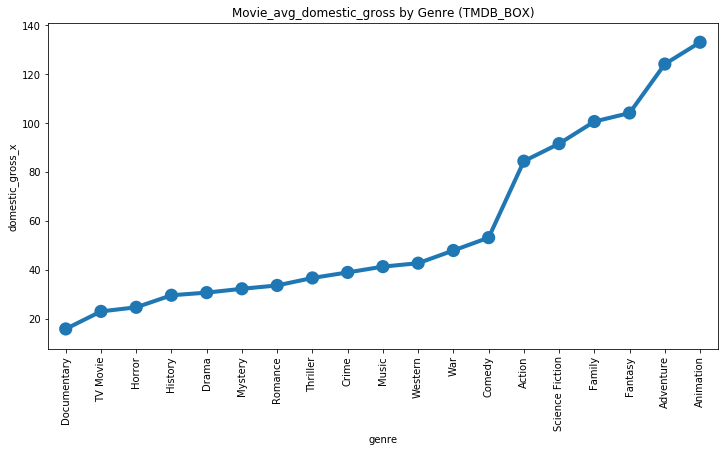

In [56]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data = genre_group.mean().sort_values('domestic_gross_x')['domestic_gross_x'].reset_index()
#sns
sns.pointplot(ax = ax, 
              x = data['genre'], 
              y = data['domestic_gross_x'],
              scale = 1.5)
plt.xticks(rotation='vertical')
plt.title('Movie_avg_domestic_gross by Genre (TMDB_BOX)');

#### Plot : Genre - MovieCount (bar plot)

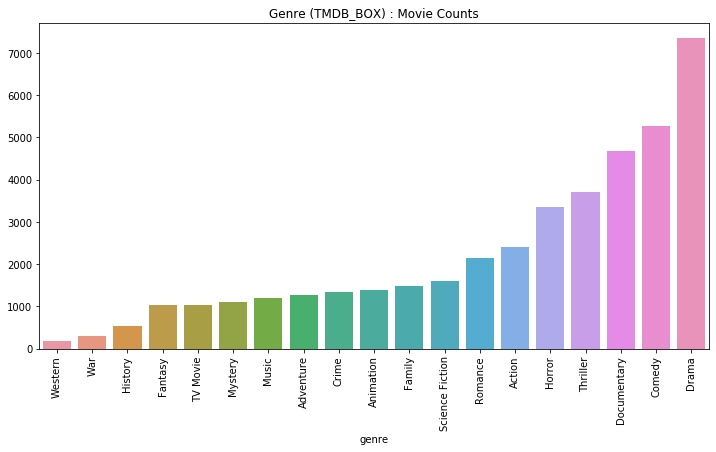

In [57]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title')['title'] #movie count
#sns - movie count
sns.barplot(ax = ax, 
            x = data_count.index, 
            y = data_count.values)            
# plt format
plt.xticks(rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts');

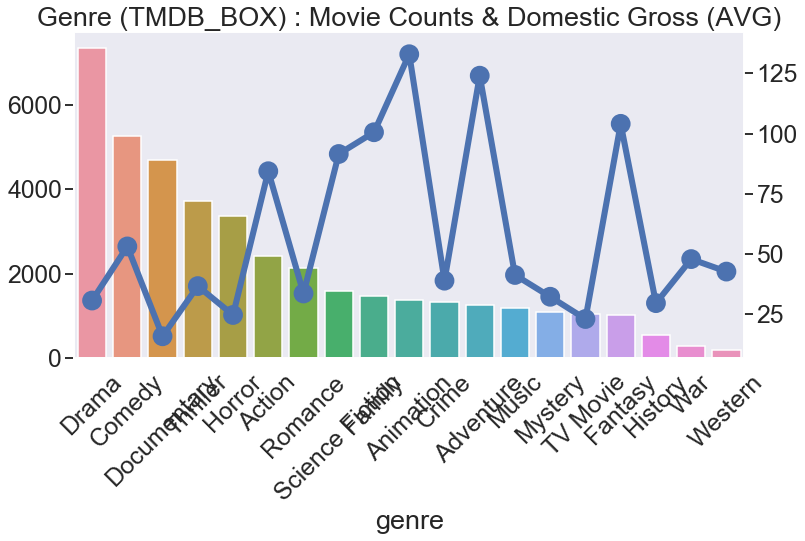

In [241]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title', ascending=False)['title'] #movie count
idx = data_count.index #index with count
data_DG_avg = genre_group.mean().loc[idx,'domestic_gross_x']#avg domestic gross
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values)
#sns - avg domestic gross
ax2=ax.twinx()
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_DG_avg.values,
             scale = 1.5) 
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=45)
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts & Domestic Gross (AVG)');

## plots - "Genre : Revene-Budget"

### Profitability Insights 
1. Most **Profitable** Genre (6): 
    - Animation
    - Adventure
    - Fantasy
    - Family
    - Science Fiction
    - Action

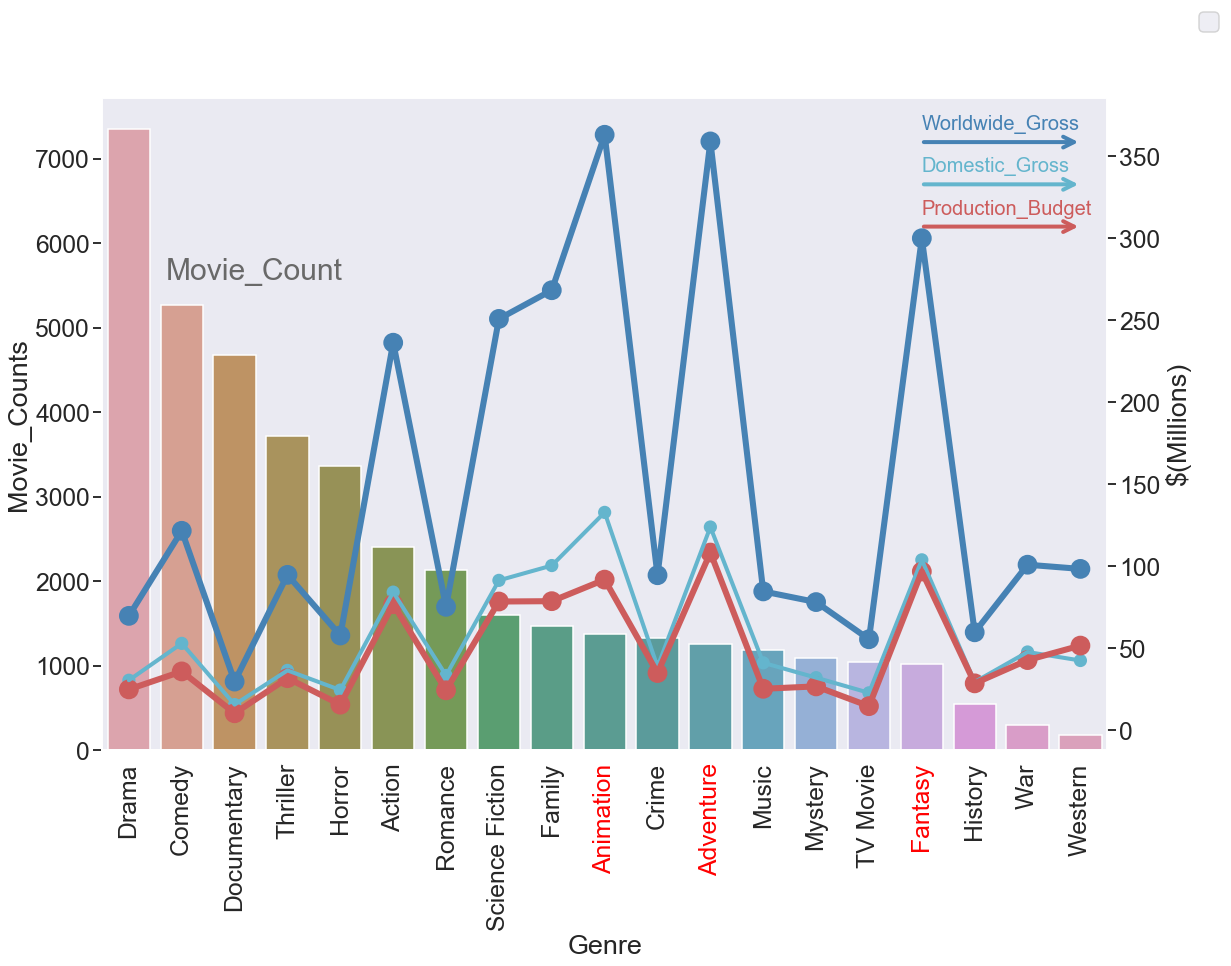

In [285]:
fig, ax = plt.subplots(figsize = (18,12))
sns.set(style='dark',font_scale=1.5, context='talk')
fig.legend(labels = ('Movie_Counts', 'worldwide_gross', 'domestic_gross', 'production_budget'))
ax2=ax.twinx()
#data
data_count = genre_group.count().sort_values('title',ascending = False)['title'] #movie count
idx = data_count.index #index with count
data_grossW = genre_group.mean().loc[idx,'worldwide_gross']#avg worldwide_gross
data_grossD = genre_group.mean().loc[idx,'domestic_gross_x']#avg worldwide_gross
data_budget = genre_group.mean().loc[idx,'production_budget'] #production_budget
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values,
            saturation=0.5              
            )
#sns - avg domestic gross

worldwide_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossW.values,
             scale = 1.5,
             color = 'steelblue'
             ) 
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossD.values,
             color = 'c'
             ) 
budget=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_budget.values,
             color = 'indianred',
             scale = 1.5
             ) 

for i in (9, 11, 15):
    movie_count.get_xticklabels()[i].set_color('red')
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=90)

ax.set_ylabel('Movie_Counts')
ax2.set_ylabel('$(Millions)')
ax.set_xlabel('Genre')
#ax.legend('')
# fontsize=12
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
#plt.title('Genre (TMDB_BOX) Analysis')
# : ' Movie_counts, Worldwide_Gross, Domestic_Gross, Production_Budget'          
#plt.legend(handlehandles = (movie_count,domestic_gross,budget), 
#           labels = ('movie count','dg','b'))

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 7200),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 7200),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='steelblue', lw=4)
            )

# Annotate Text
ax.annotate('Worldwide_Gross', # text to display
             xy=(15, 7300),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='steelblue',
             fontsize = 20
            )

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 6700),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 6700),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='c', lw=4)
            )

# Annotate Text
ax.annotate('Domestic_Gross', # text to display
             xy=(15, 6800),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='c',
             fontsize = 20
            )

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 6200),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 6200),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='indianred', lw=4)
            )

# Annotate Text
ax.annotate('Production_Budget', # text to display
             xy=(15, 6300),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='indianred',
             fontsize = 20
            )

# Annotate Text
ax.annotate('Movie_Count', # text to display
             xy=(0.7,5500),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='dimgrey',
             fontsize = 30
            )
#ax.gca().get_xticklabels()[1].set_color('red')
plt.show()

## Plot - "Genre : Vote-Count"

### Insight
- most voted Genre:
    - Adventure
    - Fantasy 
    - Science Fiction
    - Action 
    
-  While they are not the most occured genre types. They have the highest production budget.   

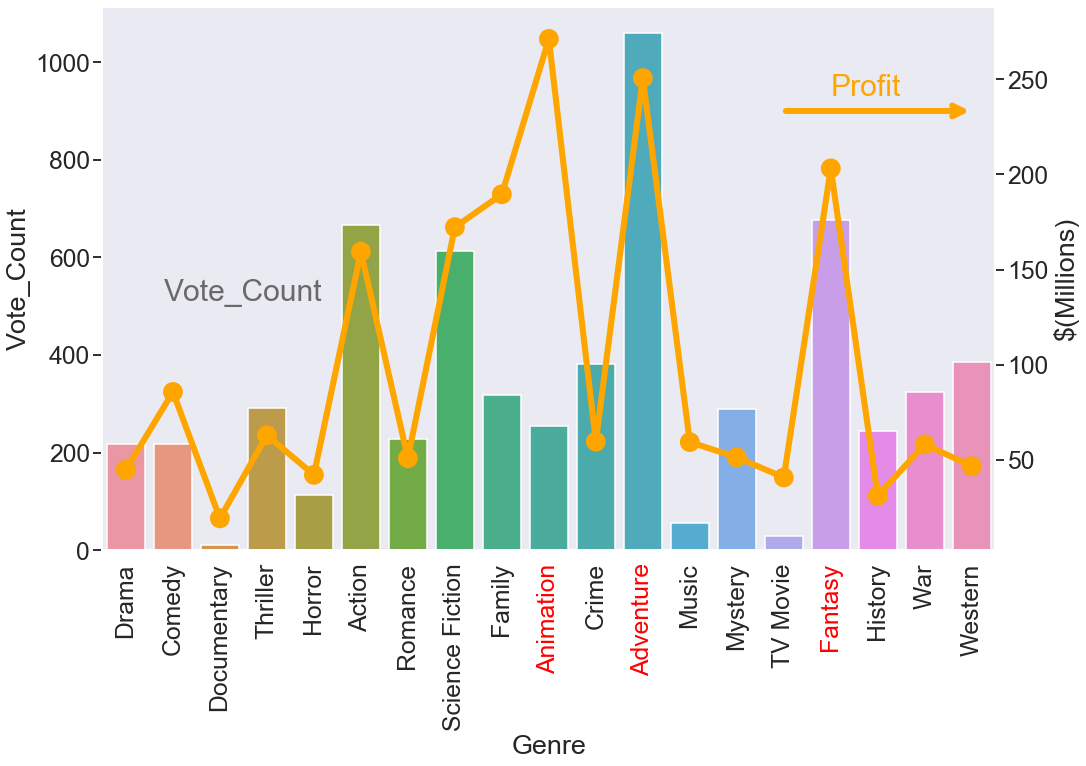

In [289]:
fig, ax = plt.subplots(figsize = (16,10))
sns.set(style='dark',font_scale=1.5, context='talk')
#data
data_count = genre_group.count().sort_values('title',ascending = False)['title'] #movie count
idx = data_count.index #index with count
data_vc = genre_group.mean().loc[idx,'vote_count']#avg vote_count
data_profit = genre_group.mean().loc[idx,'profit']# avg profit
data_grossW = genre_group.mean().loc[idx,'worldwide_gross']#avg worldwide_gross
'''
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values,
            color = 'red',
            scale = 1.5
            )
'''
vote_count = sns.barplot(ax=ax, 
             x = idx,
             y = data_vc.values) 
ax2=ax.twinx()
profit=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_profit.values,
             color = 'orange',
             scale = 1.5
             ) 
'''
worldwide_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossW.values
             )
'''             
 
for i in (9, 11, 15):
    vote_count.get_xticklabels()[i].set_color('red')
vote_count.set_xticklabels(vote_count.get_xticklabels(), rotation=90)
ax.set_ylabel('Vote_Count')
ax2.set_ylabel('$(Millions)')
ax.set_xlabel('Genre')
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
#plt.title('Genre (TMDB_BOX) : vote_count, profit ')
#plt.legend(handlehandles = (movie_count,domestic_gross,budget), 
#           labels = ('movie count','dg','b'))
#p.arrow(0, 1e9, -10.0, 1e9, fc="k", ec="k", head_width=1, head_length=1)

'''
ax.annotate("",
            xy=(1, 10),
            xytext=(1, 2),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")
            )
''' 
# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 900),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(14, 900),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=6)
            )

# Annotate Text
ax.annotate('Profit', # text to display
             xy=(15, 920),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
             color = 'orange',
             fontsize = 30)
           
# Annotate Text
ax.annotate('Vote_Count', # text to display
             xy=(0.8,500),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='dimgrey',
             fontsize = 30
            )
    
plt.show()

## Profit Insight

- Genre with most Profit:
    - Animation
    - Adventure
    - Fantasy 
    - Family
    - Science Fiction
    - Action
    

## Look into Genre ( 6 most profitable)
## their distribution (profit vs loss precentage, budget wise) - an idea of budget (initial investment) 

## Risk Analysis

In [86]:
# Groups
g_animation = genre_group.get_group('Animation')
g_adventure = genre_group.get_group('Adventure')
g_fantasy = genre_group.get_group('Fantasy')

In [89]:
g_top3 = pd.concat([g_animation, g_adventure, g_fantasy], axis = 0)


51408

In [92]:
g_top3.shape, g_animation.shape, g_fantasy.shape

((3672, 14), (1383, 14), (1025, 14))

In [93]:
g_top3.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,profit,genre
12,Tangled,260.0,200.821936,586.477240,BV,en,21.511,7.5,6407.0,2010-11-24,2010.0,11.0,326.477240,Animation
32,Toy Story 3,200.0,415.004880,1068.879522,BV,en,24.445,7.7,8340.0,2010-06-17,2010.0,6.0,868.879522,Animation
37,Monsters University,200.0,268.488329,743.588329,BV,en,20.330,7.0,6362.0,2013-06-21,2013.0,6.0,543.588329,Animation
41,Cars 2,200.0,191.450875,560.155383,BV,en,23.498,5.9,4058.0,2011-06-16,2011.0,6.0,360.155383,Animation
76,Coco,175.0,209.726015,798.008101,BV,en,25.961,8.2,8669.0,2017-11-22,2017.0,11.0,623.008101,Animation


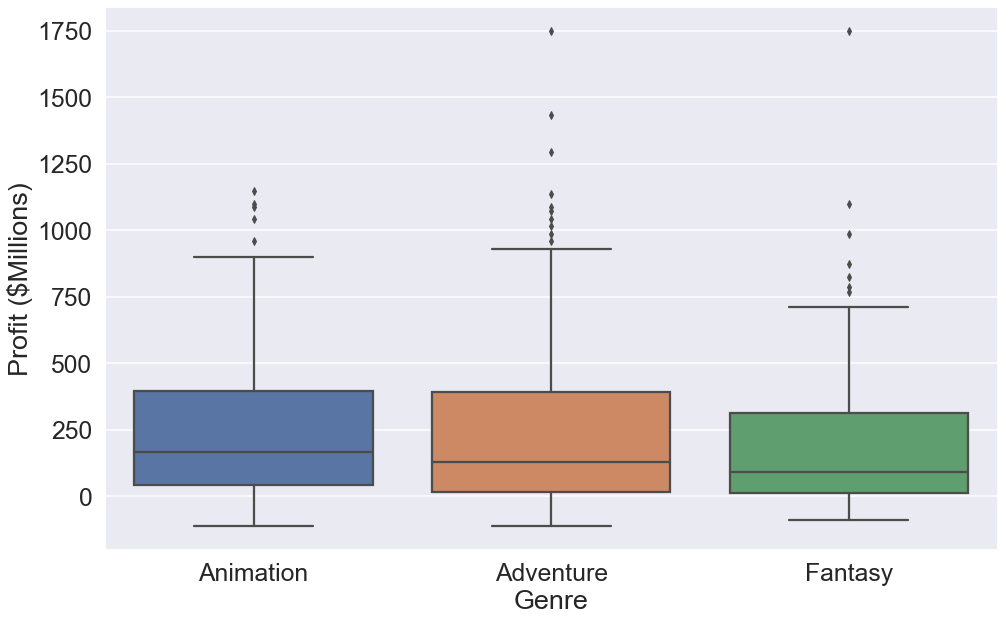

In [167]:
# Action group: Profit Distribution
fig, ax = plt.subplots(figsize = (16,10))
sns.set(style='darkgrid',font_scale=1.5, context='talk')
sns.boxplot(x='genre',y='profit', data=g_top3);
ax.set_ylabel('Profit ($Millions)')
ax.set_xlabel('Genre');

In [291]:
# Tables of Top3 (movie_count (with reported gross), loss_count, hot_movie_count(>100m))

def risk_analysis(df, genre):
    mask = ~df['profit'].isnull()
    mask_loss = df['profit']<=0 
    mask_profit = (df['profit']<1000)& (df['profit']>=100)
    mask_hot = df['profit']>=1000 
    risk_dict = {'Genre':genre,
                'Movie_Count':df[mask].count().title,
                'Loss_Count':df[mask_loss].count().title,
                'Profit100M_Count':df[mask_profit].count().title,
                'Profit1B_Count':df[mask_hot].count().title}
    df_risk = pd.DataFrame.from_dict(risk_dict, orient='index')
    return df_risk.T

In [292]:
df_animation=risk_analysis(g_animation, 'Animation')
df_adventure=risk_analysis(g_adventure, 'Adventure')
df_fantasy=risk_analysis(g_fantasy, 'Fantasy')

In [293]:
genre_risk = pd.concat([df_animation, df_adventure, df_fantasy], axis = 0)

In [294]:
genre_risk

,Genre,Movie_Count,Loss_Count,Profit100M_Count,Profit1B_Count
0,Animation,101,12,62,4
0,Adventure,271,48,144,8
0,Fantasy,164,29,77,2


In [84]:
# Top 10 movies in Action (by profit)
g_action.sort_values(by=['profit'], ascending=False).head(10)

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,profit,genre
26011,Avengers: Infinity War,300.0,678.815482,2048.134200,BV,en,80.773,8.3,13948.0,2018-04-27,2018.0,4.0,1748.134200,Action
25,Jurassic World,215.0,652.270625,1648.854864,Uni.,en,20.709,6.6,14056.0,2015-06-12,2015.0,6.0,1433.854864,Action
49,Furious 7,190.0,353.007020,1518.722794,Uni.,en,20.396,7.3,6538.0,2015-04-03,2015.0,4.0,1328.722794,Action
26026,The Avengers,225.0,623.279547,1517.935897,NaN,en,50.289,7.6,19673.0,2012-05-04,2012.0,5.0,1292.935897,Action
28,Black Panther,200.0,700.059566,1348.258224,BV,en,2.058,5.1,11.0,2011-01-18,2011.0,1.0,1148.258224,Action
81,Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,Uni.,en,34.958,6.5,5995.0,2018-06-22,2018.0,6.0,1135.772799,Action
2,Avengers: Age of Ultron,330.6,459.005868,1403.013963,BV,en,44.383,7.3,13457.0,2015-05-01,2015.0,5.0,1072.413963,Action
29,Incredibles 2,200.0,608.581744,1242.520711,BV,en,36.286,7.6,6354.0,2018-06-15,2018.0,6.0,1042.520711,Action
33,Iron Man 3,200.0,408.992272,1215.392272,BV,en,32.093,6.9,14155.0,2013-05-03,2013.0,5.0,1015.392272,Action
101,Aquaman,160.0,335.061807,1146.894640,WB,en,38.102,6.8,6155.0,2018-12-21,2018.0,12.0,986.894640,Action


In [85]:
# 10 movies in biggist loss in Action (by profit)
g_action.sort_values(by=['profit']).head(10)

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,profit,genre
272,Bright,90.0,0.000000,0.000000,NaN,en,15.677,6.2,3181.0,2017-12-22,2017.0,12.0,-90.000000,Action
26317,Renegades,77.5,0.000000,1.521672,NaN,fr,9.022,5.8,156.0,2018-12-21,2018.0,12.0,-75.978328,Action
52283,The Nutcracker in 3D,90.0,0.195459,20.466016,Free,en,7.566,5.5,97.0,2010-11-24,2010.0,11.0,-69.533984,Action
52391,Air Strike,65.0,0.000000,0.516279,NaN,en,6.971,3.9,56.0,2018-10-26,2018.0,10.0,-64.483721,Action
186,Monster Trucks,125.0,33.370166,61.642798,Par.,en,8.827,5.9,414.0,2017-01-13,2017.0,1.0,-63.357202,Action
26173,R.I.P.D.,130.0,33.618855,79.076678,Uni.,en,21.377,5.6,2047.0,2013-07-19,2013.0,7.0,-50.923322,Action
52361,Blackhat,70.0,8.005980,19.665004,Uni.,en,16.824,5.3,1165.0,2015-01-16,2015.0,1.0,-50.334996,Action
26534,Foodfight!,45.0,0.000000,0.073706,NaN,en,4.705,2.1,46.0,2013-05-07,2013.0,5.0,-44.926294,Action
604,USS Indianapolis: Men of Courage,40.0,0.000000,1.663785,NaN,en,11.221,5.9,328.0,2017-01-24,2017.0,1.0,-38.336215,Action
509,Jonah Hex,47.0,10.547117,11.022696,WB,en,13.467,4.6,708.0,2010-06-18,2010.0,6.0,-35.977304,Action


In [ ]:
g_action['profit'].sort_values()

In [76]:
precentage_loss = g_action[mask_loss].count().title/g_action.count().title
precentage_loss 

0.050165837479270316

In [ ]:
# Check 
print(tmdb_box_genre.shape)
tmdb_box_genre.sort_values('title', axis=0).head(3)